In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
X_cont = df[df.columns[[0,3,4,7,9,12]]]
X_cont

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
903,53,125,0,120,1.5,4
904,62,166,170,120,3.0,4
905,56,170,0,123,2.5,4
906,56,144,208,105,NaN,4


In [5]:
X_cat = df.drop(X_cont.columns,axis=1)
X_cat

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,False,normal,False,flat,fixed defect
2,Male,asymptomatic,False,normal,False,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,False,normal,True,flat,fixed defect
...,...,...,...,...,...,...,...
903,Male,asymptomatic,False,normal,False,upsloping,reversable defect
904,Male,asymptomatic,False,st-t abnormality,True,flat,reversable defect
905,Male,non-anginal,False,lv hypertrophy,True,downsloping,normal
906,Male,non-anginal,True,st-t abnormality,TURE,downsloping,fixed defect


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df["oldpeak"].median()

0.5

In [ ]:
df['oldpeak'].mean()

np.float64(0.8912529550827422)

In [ ]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
df.nunique()

,0
age,49
sex,2
cp,4
trestbps,85
chol,228
fbs,2
restecg,3
thalch,122
exang,4
oldpeak,53


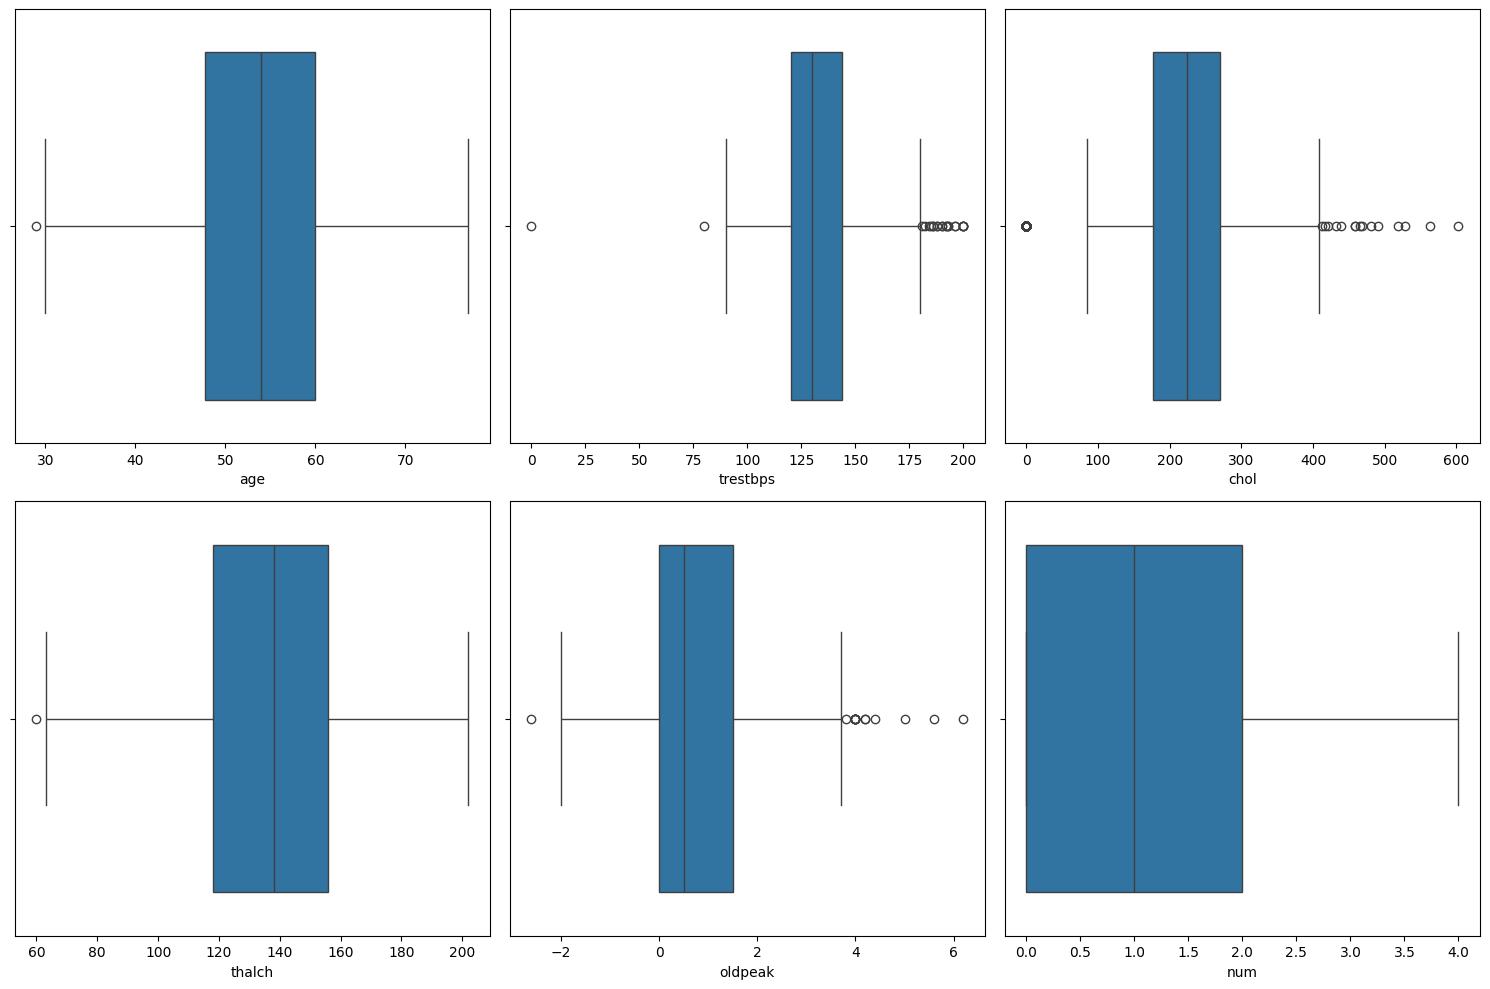

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Arrange plots in a 2x3 grid
    sns.boxplot(x=df[col])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

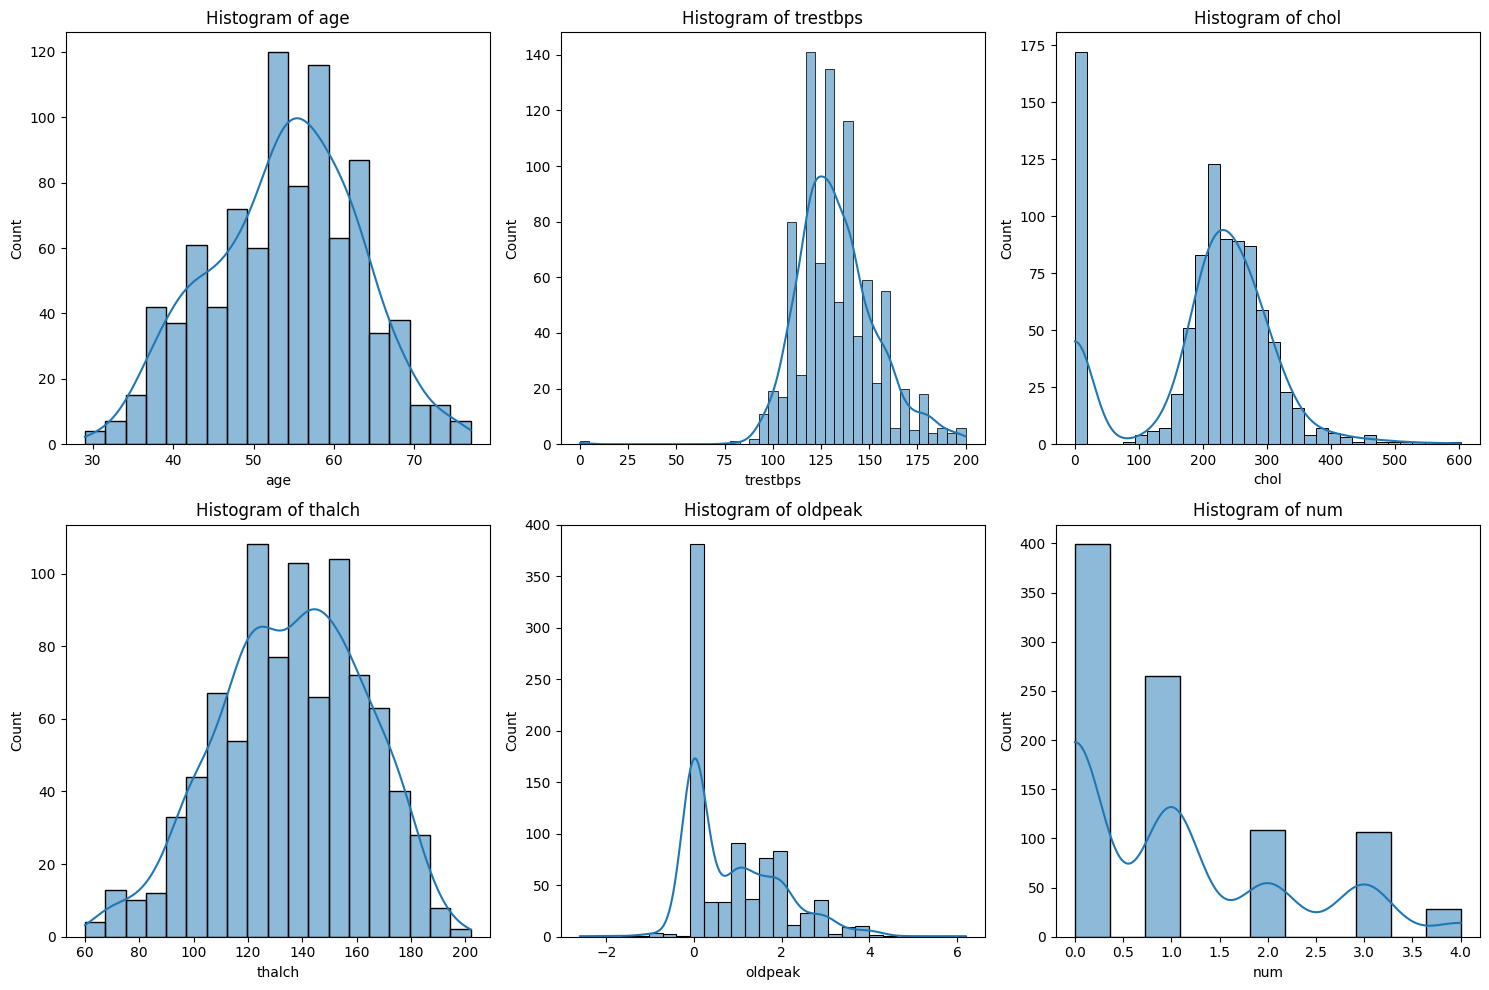

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a histogram for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Arrange plots in a 2x3 grid
    sns.histplot(data=df, x=col, kde=True) # Use histplot with kde for density curve
    plt.title(f'Histogram of {col}')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

Correlation Matrix:
               age  trestbps      chol    thalch   oldpeak       num
age       1.000000  0.253999 -0.099967 -0.328088  0.242662  0.326493
trestbps  0.253999  1.000000  0.117488 -0.133360  0.167131  0.137251
chol     -0.099967  0.117488  1.000000  0.197907  0.029898 -0.238813
thalch   -0.328088 -0.133360  0.197907  1.000000 -0.139598 -0.323058
oldpeak   0.242662  0.167131  0.029898 -0.139598  1.000000  0.437577
num       0.326493  0.137251 -0.238813 -0.323058  0.437577  1.000000


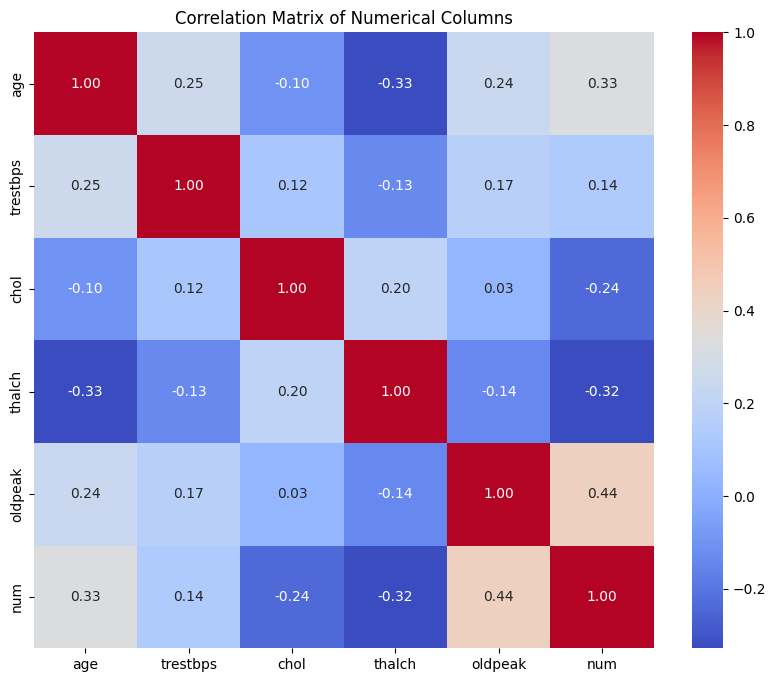

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outliers for column '{col}':")
    print(outliers[[col]]) # Display only the outlier values for clarity
    print("-" * 30)

Outliers for column 'age':
     age
134   29
------------------------------
Outliers for column 'trestbps':
     trestbps
190        80
243       190
383       181
384       188
387       193
396       196
487       192
488       185
589       200
766       184
768       192
771       186
789       200
791       200
795       200
797       188
842         0
872       182
873       196
875       193
879       186
900       190
------------------------------
Outliers for column 'chol':
     chol
74    417
147   439
152     0
157   564
176     0
..    ...
893     0
895     0
901     0
903     0
905     0

[187 rows x 1 columns]
------------------------------
Outliers for column 'thalch':
     thalch
676      60
------------------------------
Outliers for column 'oldpeak':
     oldpeak
149      4.2
525     -2.6
537      4.0
587      5.0
722      4.0
773      4.0
792      6.2
794      5.6
795      4.0
814      4.2
839      4.0
880      4.4
889      4.0
894      3.8
898      4.0
899      4.0

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with IQR
    df[col] = np.where(df[col] < lower_bound, IQR, df[col])
    df[col] = np.where(df[col] > upper_bound, IQR, df[col])

print("Outliers have been replaced with IQR for numerical columns.")

Outliers have been replaced with IQR for numerical columns.


In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

print("Numerical columns:", numerical_cols.tolist())
print("Categorical columns:", categorical_cols.tolist())

Numerical columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
Categorical columns: ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']


In [13]:
df.nunique()

,0
age,49
sex,2
cp,4
trestbps,73
chol,213
fbs,2
restecg,3
thalch,122
exang,4
oldpeak,45


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Clean inconsistent values in 'exang' column
df['exang'] = df['exang'].replace({'FALSE': False, 'TURE': True})

# Convert boolean columns to object type
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(object)

# Select categorical columns (now includes the converted boolean columns)
categorical_cols = df.select_dtypes(include='object').columns

# Initialize OneHotEncoder
# handle_unknown='ignore' will ignore categories not seen during fit
# sparse_output=False will return a dense array
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_categorical_data = one_hot_encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data with appropriate column names
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the dataframe
df_numerical = df.drop(columns=categorical_cols)

# Concatenate the numerical and one-hot encoded categorical dataframes
df_encoded = pd.concat([df_numerical, encoded_categorical_df], axis=1)

print("Original DataFrame shape:", df.shape)
print("Encoded DataFrame shape:", df_encoded.shape)
display(df_encoded.head())

Original DataFrame shape: (908, 13)
Encoded DataFrame shape: (908, 25)


/tmp/ipython-input-2450378677.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'FALSE': False, 'TURE': True})


,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,145.0,233.0,150.0,2.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41.0,135.0,203.0,132.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57.0,140.0,192.0,148.0,0.4,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52.0,118.0,186.0,190.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57.0,110.0,201.0,126.0,1.5,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
df_encoded.shape

(908, 25)

In [17]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in 'sex':
['Male' 'Female']
------------------------------
Unique values in 'cp':
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
------------------------------
Unique values in 'fbs':
[True False]
------------------------------
Unique values in 'restecg':
['lv hypertrophy' 'normal' 'st-t abnormality']
------------------------------
Unique values in 'exang':
[False True]
------------------------------
Unique values in 'slope':
['downsloping' 'flat' 'upsloping']
------------------------------
Unique values in 'thal':
['fixed defect' 'normal' 'reversable defect']
------------------------------


In [18]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (726, 24)
Shape of X_test: (182, 24)
Shape of y_train: (726,)
Shape of y_test: (182,)


In [19]:
df['num'].value_counts()
df['num'].unique()


array([0., 1., 2., 3., 4.])

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Classifier - Baseline Model")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Decision Tree Classifier - Baseline Model
Accuracy: 0.5000
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74        89
         1.0       0.28      0.31      0.30        48
         2.0       0.27      0.18      0.22        22
         3.0       0.32      0.35      0.33        17
         4.0       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.49      0.50      0.50       182



In [21]:
from sklearn.model_selection import cross_val_score

# Perform 100-fold cross-validation
cv_scores = cross_val_score(decision_tree_model, X, y, cv=100)

print("Cross-validation scores (100 folds):", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 28 members, which is less than n_splits=100.
  warnings.warn(


Cross-validation scores (100 folds): [0.3        0.6        0.4        0.5        0.4        0.4
 0.5        0.5        0.44444444 0.44444444 0.55555556 0.44444444
 0.44444444 0.33333333 0.44444444 0.33333333 0.44444444 0.33333333
 0.66666667 0.22222222 0.44444444 0.55555556 0.33333333 0.88888889
 0.66666667 0.44444444 0.66666667 0.44444444 0.44444444 0.44444444
 0.22222222 0.55555556 0.55555556 0.22222222 0.33333333 0.55555556
 0.55555556 0.33333333 0.66666667 0.33333333 0.55555556 0.33333333
 0.55555556 0.33333333 0.44444444 0.44444444 0.44444444 0.11111111
 0.55555556 0.22222222 0.55555556 0.44444444 0.22222222 0.11111111
 0.66666667 0.55555556 0.55555556 0.33333333 0.33333333 0.44444444
 0.44444444 0.66666667 0.11111111 0.33333333 0.55555556 0.44444444
 0.77777778 0.55555556 0.66666667 0.66666667 0.55555556 0.33333333
 0.33333333 0.55555556 0.77777778 0.33333333 0.44444444 0.44444444
 0.33333333 0.44444444 0.33333333 0.22222222 0.66666667 0.44444444
 0.77777778 0.55555556 0.7777777

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate individual metrics (already available in classification_report, but printing explicitly)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# For precision, recall, and f1-score, we need to specify the averaging method for multi-class classification
# 'weighted' average takes into account the proportion of each class
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

Confusion Matrix:
[[66 16  1  4  2]
 [18 15  8  6  1]
 [ 3 11  4  3  1]
 [ 3  7  0  6  1]
 [ 0  4  2  0  0]]

Accuracy: 0.5000
Weighted Precision: 0.4950
Weighted Recall: 0.5000
Weighted F1-score: 0.4962


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train a new model with the best parameters
best_decision_tree_model = DecisionTreeClassifier(**best_params, random_state=42)
best_decision_tree_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tuned = best_decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

print("\nTuned Decision Tree Classifier - Evaluation on Test Set")
print(f"Accuracy: {accuracy_tuned:.4f}")
print("Classification Report:")
print(report_tuned)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5317

Tuned Decision Tree Classifier - Evaluation on Test Set
Accuracy: 0.5549
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77        89
         1.0       0.39      0.56      0.46        48
         2.0       0.00      0.00      0.00        22
         3.0       0.15      0.12      0.13        17
         4.0       0.00      0.00      0.00         6

    accuracy                           0.55       182
   macro avg       0.25      0.30      0.27       182
weighted avg       0.47      0.55      0.51       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


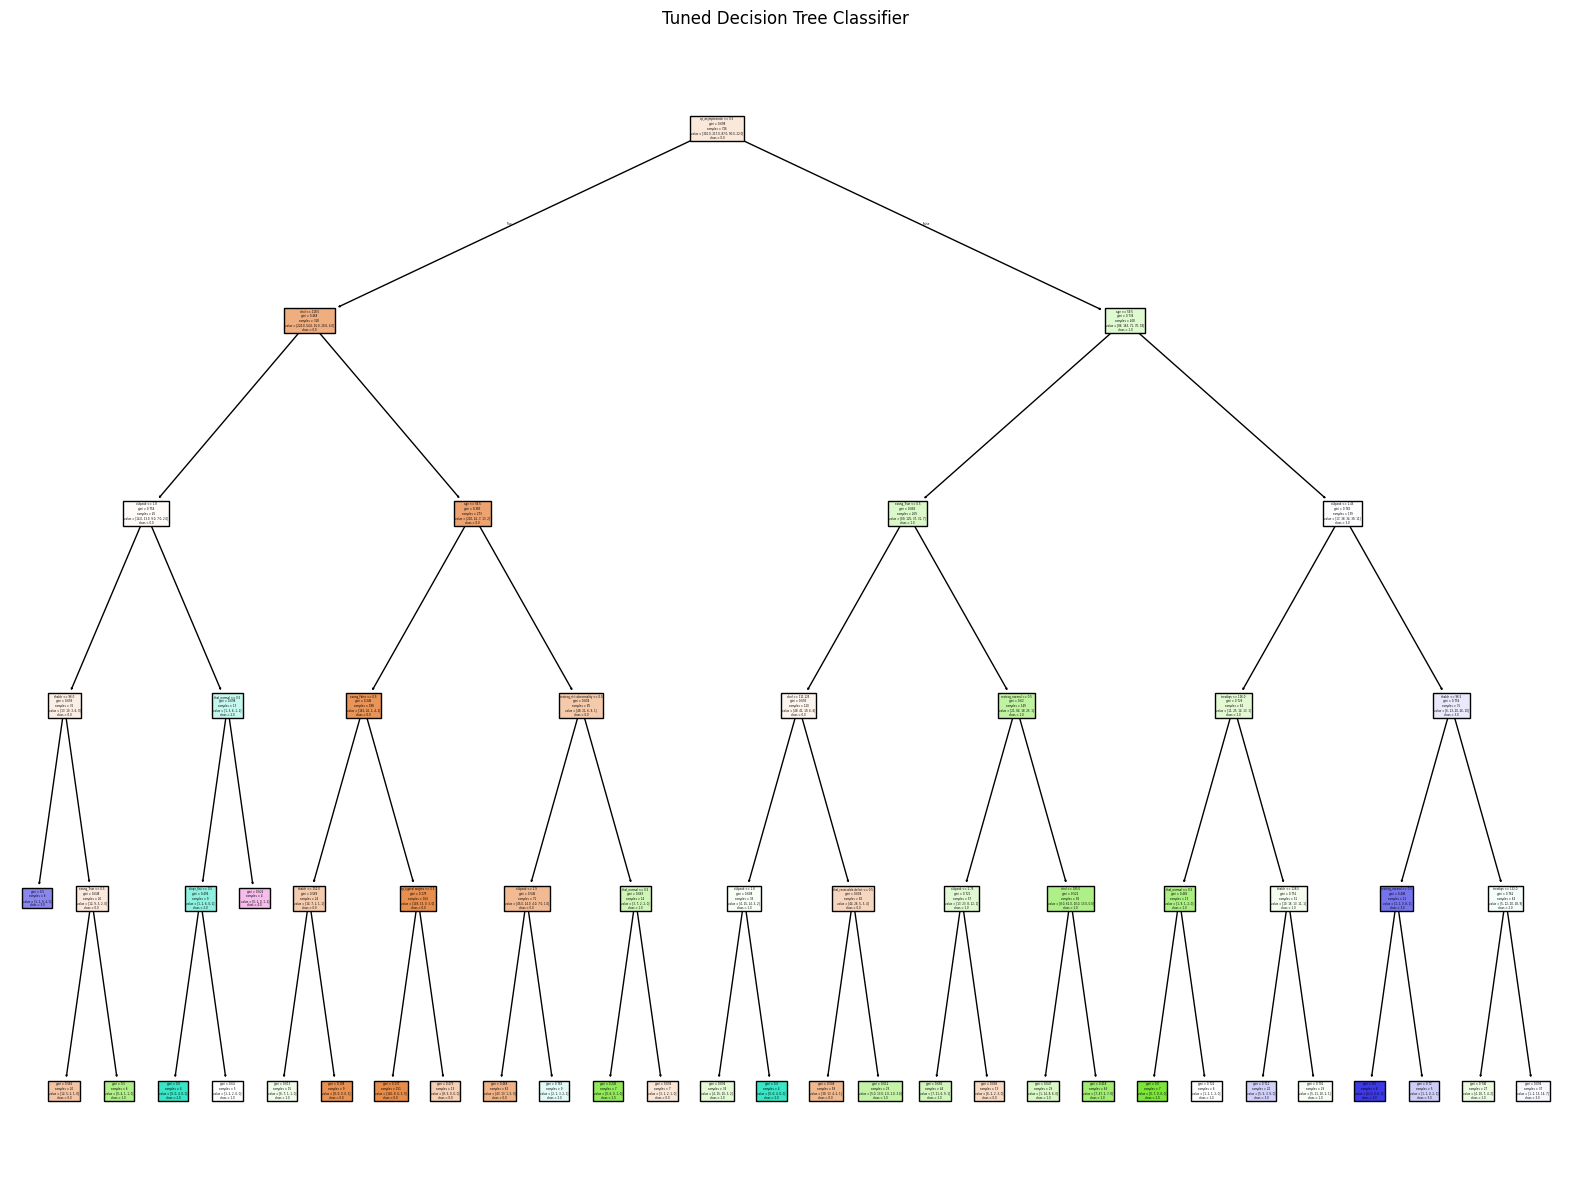

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(best_decision_tree_model, filled=True, feature_names=X.columns.tolist(), class_names=[str(i) for i in sorted(y.unique())])
plt.title("Tuned Decision Tree Classifier")
plt.show()

Based on the classification report and accuracy scores from the baseline and tuned Decision Tree models, here's an analysis of the performance:

**Baseline Decision Tree Model:**

*   **Accuracy:** 0.5000
*   **Classification Report:**
    *   The model shows reasonable precision and recall for class 0 (no heart disease), but the performance for the other classes (1, 2, 3, and 4) is significantly lower.
    *   The f1-scores for classes 1, 2, 3, and 4 are quite low, indicating poor performance in identifying these classes.
    *   The macro average and weighted average f1-scores are also low, suggesting that the model's overall performance across all classes is not strong.

**Tuned Decision Tree Model:**

*   **Accuracy:** 0.5549
*   **Classification Report:**
    *   The accuracy improved slightly after hyperparameter tuning.
    *   The precision and recall for class 0 are still the highest.
    *   For classes 2 and 4, the precision and recall are 0.00, meaning the model is unable to correctly predict any instances of these classes. This is a significant issue.
    *   The performance for classes 1 and 3 is still relatively low.
    *   The weighted average f1-score improved slightly compared to the baseline, but the macro average f1-score is lower, likely due to the complete failure to predict classes 2 and 4.

**Confusion Matrix (Baseline Model):**

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Answer:
Some common hyperparameters of Decision Tree models are:

max_depth:

Defines the maximum depth of the tree.

A larger depth allows the tree to capture more patterns (risk of overfitting).

A smaller depth prevents overfitting but may cause underfitting.

min_samples_split:

The minimum number of samples required to split a node.

A higher value makes the tree more conservative (less overfitting).

A lower value allows more splits, possibly leading to overfitting.

min_samples_leaf:

The minimum number of samples required to be at a leaf node.

Prevents creating very small leaf nodes.

Larger values make the model simpler and more generalized.

max_features:

Number of features considered when looking for the best split.

Reduces variance when set to a subset of features but may increase bias.
criterion (gini or entropy):

Defines the function to measure the quality of a split.

Gini is faster; entropy gives more information gain-based splits.





What is the difference between Label Encoding and One-Hot Encoding?

Answer:

Label Encoding:

Converts categorical values into numeric labels (e.g., Red=0, Green=1, Blue=2).

Useful for ordinal data (where categories have order, like Small < Medium < Large).

Drawback: Introduces an artificial numeric relationship for nominal data (e.g., Red=0 and Blue=2 may look like Blue > Red, which is not meaningful).

One-Hot Encoding:

Creates new binary columns for each category.

Example: Color = Red, Green, Blue → [1,0,0], [0,1,0], [0,0,1].

Useful for nominal data (no order between categories).

Drawback: Increases dimensionality if categories are many (sparse matrix).

The hyperparameter tuning for the Decision Tree was performed using `GridSearchCV` to find the best combination of parameters that maximizes the model's accuracy. Here's an explanation of the hyperparameters that were tuned:

*   **`max_depth`**: This parameter controls the maximum depth of the decision tree. A deeper tree can capture more complex relationships in the data but is also more prone to overfitting. Setting `max_depth=None` means the tree will expand until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
*   **`min_samples_split`**: This is the minimum number of samples required to split an internal node. A higher value prevents the tree from splitting on very small groups of samples, which can help to reduce overfitting.
*   **`min_samples_leaf`**: This is the minimum number of samples required to be at a leaf node. Similar to `min_samples_split`, a higher value can help to smooth the model and prevent it from learning noise in the data.
*   **`criterion`**: This parameter determines the function used to measure the quality of a split. The two common options are:
    *   **`gini`**: This refers to the Gini impurity, which measures the probability of misclassifying a randomly chosen element in the dataset if it were labeled according to the distribution of labels in the subset.
    *   **`entropy`**: This refers to the information gain, which is based on the concept of entropy and measures the reduction in uncertainty achieved by a split.

The `GridSearchCV` explored different combinations of these hyperparameters and identified the set that yielded the best performance on the training data through cross-validation.